## Imports and datasets

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [6]:
df = pd.read_pickle("data/jobs.pkl")
print(f"{df.shape = }")
df.head()

df.shape = (2352, 14)


,url,job_title,company_name,company_rating,number_of_reviews,annual_salary,location,remote,full_time,temporary,internship,experience_level,degree,requirements
0,https://www.indeed.com/viewjob?cmp=lcoleman%40...,Data Scientist I,None,None,None,59600,"Fort Benning, GA 31905",False,True,False,False,Entry level,Bachelor,"statistical software,microsoft office,programm..."
1,https://www.indeed.com/viewjob?jk=001582624bed...,Product Review Clerk,None,3.2,434,44400,"Lemoore, CA 93245",False,True,False,False,Mid level,Bachelor,"microsoft office,excel"
2,https://www.indeed.com/viewjob?jk=00432e5b8ab8...,Senior Data Analyst,Sysco Labs,4.1,9,97700,"Austin, TX 78702",False,True,False,False,Senior level,Bachelor,"data visualization,power bi,cloud technologies..."
3,https://www.indeed.com/viewjob?jk=0044911b6206...,Data Analyst - Workplace Experience,Electronic Arts,3.8,555,None,"Los Angeles, CA",False,True,False,False,Mid level,Bachelor,"sql,tableau,power bi,data visualization"
4,https://www.indeed.com/viewjob?jk=00486361f7b8...,"Senior Deep Learning Scientist, Prediction - A...",None,4.2,248,None,"Redmond, WA",False,True,False,False,Senior level,PhD,"tensorflow,machine learning with python,progra..."


In [7]:
reqs_df = pd.read_pickle("data/requirements.pkl")
reqs_df.head()

,group_of_requirements,requirement,experience_level,degree,remote,full_time,temporary,internship,number_of_occurrences
0,sql,sql,Entry level,No degree,True,True,True,True,0
1,sql,sql,Entry level,No degree,True,True,True,False,0
2,sql,sql,Entry level,No degree,True,True,False,True,0
3,sql,sql,Entry level,No degree,True,True,False,False,29
4,sql,sql,Entry level,No degree,True,False,True,True,0


## Analysis

### Salaries analysis

#### General salaries analysis

As we can see from the histogram below salaries in data science are approximately normally distributed with the mean at almost \\$110,000 a year. Salaries range from approximately \$30,000 to \\$280,000.

From the box plot below we can see that middle 50% of data scientists earn from \\$90,000 to \$130,000. Also we can notice that only outliers are getting above \\$200,000.

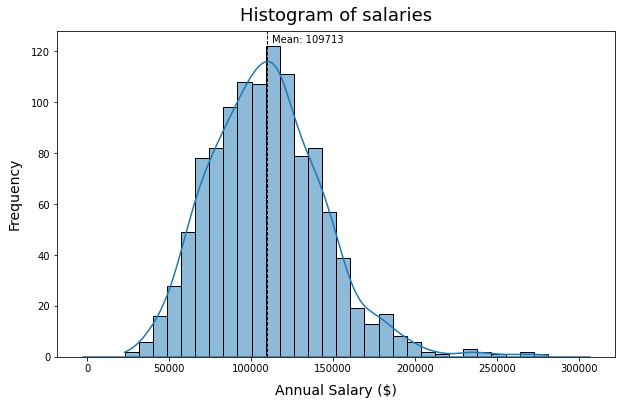

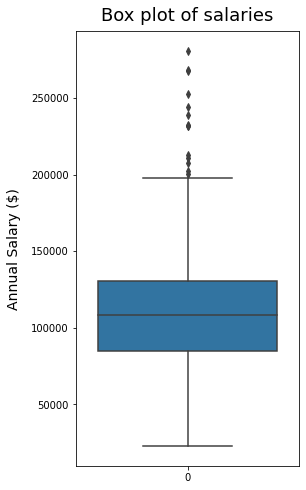

In [111]:
salaries = df[df['annual_salary'].notna()]["annual_salary"]
salaries = salaries.astype('int32')

plt.figure()
sns.histplot(data=salaries, kde=True)
plt.title("Histogram of salaries", fontsize=18, pad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)
plt.xlabel("Annual Salary ($)", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(10, 6)

plt.axvline(salaries.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(salaries.mean()*1.03, max_ylim*0.965, 'Mean: {:.0f}'.format(salaries.mean()))

sns.kdeplot(salaries)

plt.show()

ax = sns.boxplot(data=salaries)
plt.title("Box plot of salaries", fontsize=18, pad=10)
plt.ylabel("Annual Salary ($)", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(4, 8)

#### Salaries analysis for different experience levels

From the box plots below we can make fairly obvious conclusions that the more experience you have, the higher your salary is. However now we can tell how higher. 

Median salary for data scientists increases from \\$90,000 for entry level to \$105,000 for mid level to \\$130,000 for senior level.

Also we can notice that after the entry level salaries below \\$50,000 are not common.

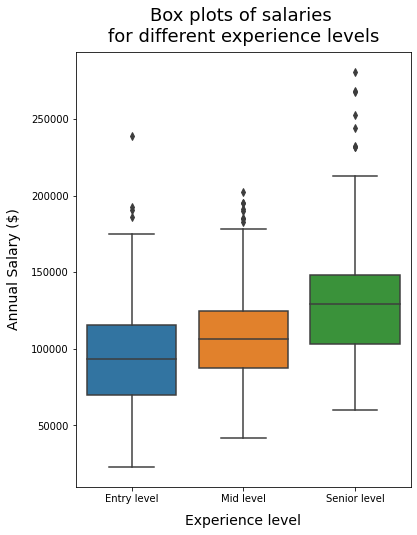

In [75]:
salaries = df[df['annual_salary'].notna()]

ax = sns.boxplot(x="experience_level", y="annual_salary", data=salaries, order=["Entry level", "Mid level", "Senior level"])
plt.title("Box plots of salaries \nfor different experience levels", fontsize=18, pad=10)
plt.ylabel("Annual Salary ($)", fontsize=14, labelpad=10)
plt.xlabel("Experience level", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(6, 8)

#### Salaries analysis for different degrees

From the side-by-side box plots below we can make a few interesting points:
- A lot of employers do not require a degree;
- There is not much of a difference between having Bachelor's degree and not having degree at all;
- Master's degree considerably insreases lower salary bound;
- PhD, unlike other degrees, considerably insreases median salary.

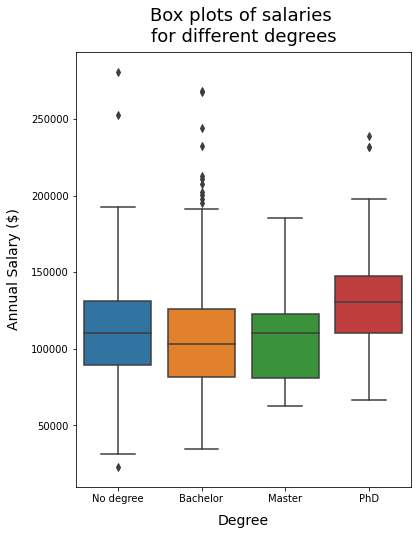

In [76]:
salaries = df[df['annual_salary'].notna()]

ax = sns.boxplot(x="degree", y="annual_salary", data=salaries, order=["No degree", "Bachelor", "Master", "PhD"])
plt.title("Box plots of salaries \nfor different degrees", fontsize=18, pad=10)
plt.ylabel("Annual Salary ($)", fontsize=14, labelpad=10)
plt.xlabel("Degree", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(6, 8)

#### Salaries analysis for remote and office work

When comparing salary box plots for remote and office work we can notice that the difference is neglectable. After examining the pie chart we can see that one third of the job offers support remote work. So we can make conclusion that data scientists can comfortly working from home.

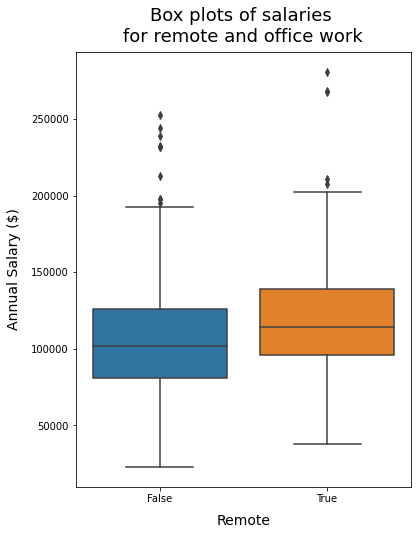

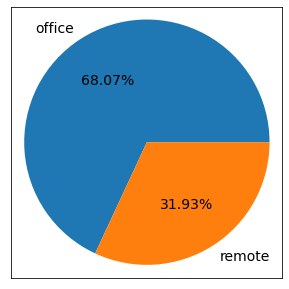

In [139]:
salaries = df[df['annual_salary'].notna()]

ax = sns.boxplot(x="remote", y="annual_salary", data=salaries)
plt.title("Box plots of salaries \nfor remote and office work", fontsize=18, pad=10)
plt.ylabel("Annual Salary ($)", fontsize=14, labelpad=10)
plt.xlabel("Remote", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(6, 8)
plt.show()

remote = df.groupby("remote")["url"].count()
plt.pie(remote, autopct='%.2f%%', labels=["office", "remote"], frame=True, textprops={'fontsize': 14})
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.show()

### Requirements analysis

#### General requirements analysis

Below you can see bar chart for requirements frequency and side-by-side bar chart for requirements frequency for each of the experience levels.

The most popular requirements are SQL, R, Python and data visualizations (though it is fair to say that most of the time employers require "Python or R").

We can notice that requirements do not change dramatically with experience. It can be explained by the fact that for more experienced employees employers probably require higher skills with each of the tools.

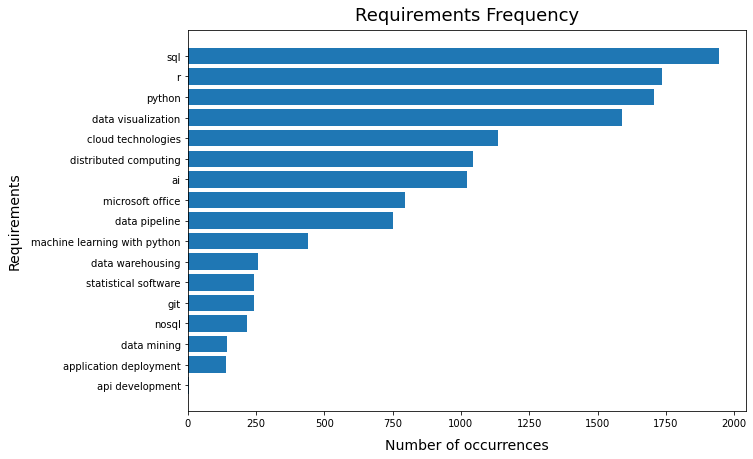

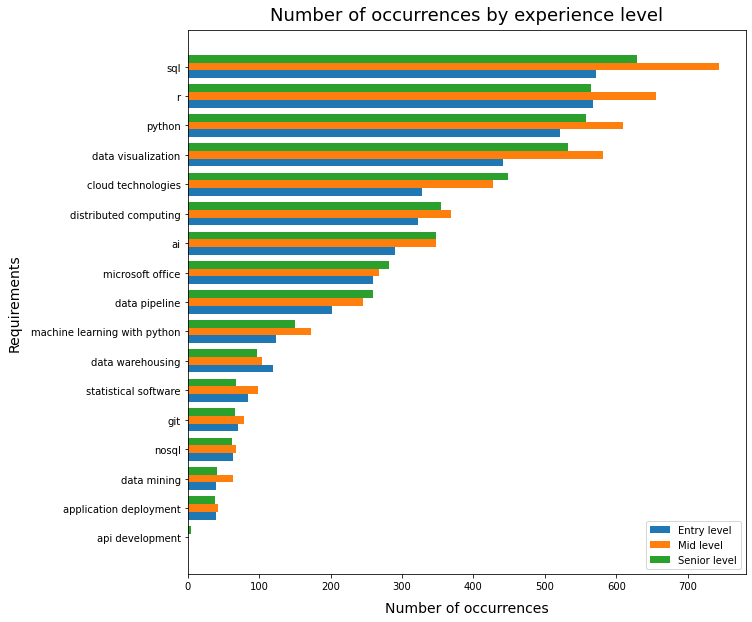

In [4]:
groups_and_occurrences = reqs_df.groupby("group_of_requirements")["number_of_occurrences"].sum()
groups_and_occurrences = groups_and_occurrences.replace(0, None).dropna().drop(["programming languages"]).sort_values()

plt.barh(y=groups_and_occurrences.keys(), width=groups_and_occurrences)
plt.title("Requirements Frequency", fontsize=18, pad=10)
plt.ylabel("Requirements", fontsize=14, labelpad=10)
plt.xlabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

entry_ser = reqs_df.loc[reqs_df.experience_level == "Entry level"].groupby("group_of_requirements")["number_of_occurrences"].sum()
entry_ser= entry_ser.drop(["programming languages"]).sort_values()

mid_ser = reqs_df.loc[reqs_df.experience_level == "Mid level"].groupby("group_of_requirements")["number_of_occurrences"].sum()
mid_ser= mid_ser.dropna().drop(["programming languages"]).sort_values()

senior_ser = reqs_df.loc[reqs_df.experience_level == "Senior level"].groupby("group_of_requirements")["number_of_occurrences"].sum()
senior_ser= senior_ser.dropna().drop(["programming languages"]).sort_values()

x = np.arange(0, 2 * len(groups_and_occurrences.keys()), 2)  # the label locations
width = 0.35 * 1.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(y = x - width, width = entry_ser, height = width, label = 'Entry level')
rects2 = ax.barh(y = x, width = mid_ser, height = width, label = 'Mid level')
rects3 = ax.barh(y = x + width, width = senior_ser, height = width, label = 'Senior level')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel("Number of occurrences", fontsize=14, labelpad=10)
ax.set_ylabel('Requirements', fontsize=14, labelpad=10)
ax.set_title('Number of occurrences by experience level', fontsize=18, pad=10)
ax.set_yticks(x, groups_and_occurrences.keys())
ax.legend(loc='lower right')
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.show()

#### The most popular programming languages for data science

By a large margin, two the most popular programming languages for data science are Python and R (though it is fair to say that most of the time employers require "Python or R").

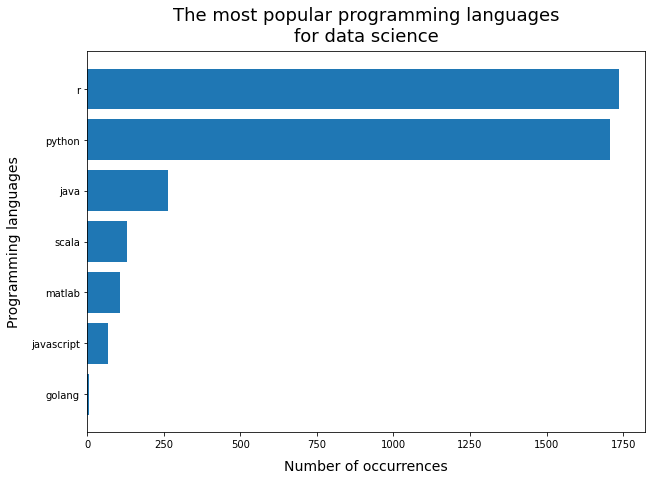

In [81]:
groups_and_occurrences = reqs_df.groupby("group_of_requirements")["number_of_occurrences"].sum()
prog_langs = reqs_df.loc[reqs_df.group_of_requirements == "programming languages"].groupby("requirement")["number_of_occurrences"].sum()
prog_langs.python = groups_and_occurrences.python
prog_langs.r = groups_and_occurrences.r
prog_langs = prog_langs.replace(0, None).dropna().drop("programming languages").sort_values()

plt.barh(y=prog_langs.keys(), width=prog_langs)
plt.title("The most popular programming languages\nfor data science", fontsize=18, pad=10)
plt.ylabel("Programming languages", fontsize=14, labelpad=10)
plt.xlabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

#### The most popular python libraries and frameworks

Based on the bar chart below we can tell that that the most popular python libraries and frameworks are those related to machine learning (Tensorflow, PyTorch) and those related to math and science (NumPy, SciPy). However, when employers require Python for EDA they might not explicitly mention Pandas (definitely the most popular Python library for data science) and visualizations libraries (Matplotlib, Seaborn, plotly).

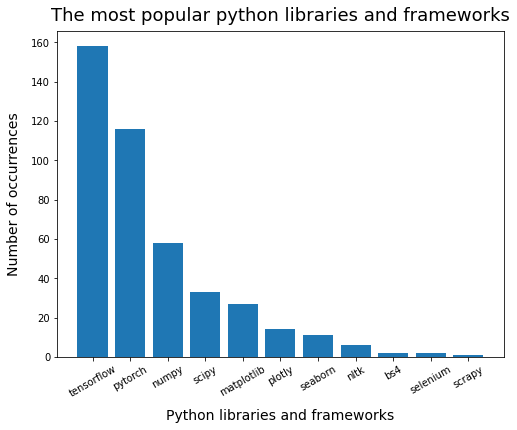

In [82]:
python = reqs_df.loc[reqs_df.group_of_requirements == "python"].groupby("requirement")["number_of_occurrences"].sum()
python = python.replace(0, None).dropna().drop("python").sort_values(ascending=False)

plt.bar(x=python.keys(), height=python)
plt.title("The most popular python libraries and frameworks", fontsize=18, pad=10)
plt.xlabel("Python libraries and frameworks", fontsize=14, labelpad=10)
plt.ylabel("Number of occurrences", fontsize=14, labelpad=10)
plt.xticks(rotation = 30)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

#### The most popular tools for data visualization

We can clearly see that the most popular tools for data visualization are Tableau and Power BI. However, when employers require Python or R for EDA they might not explicitly mention visualizations libraries (Matplotlib, Seaborn, plotly, ggplot2).

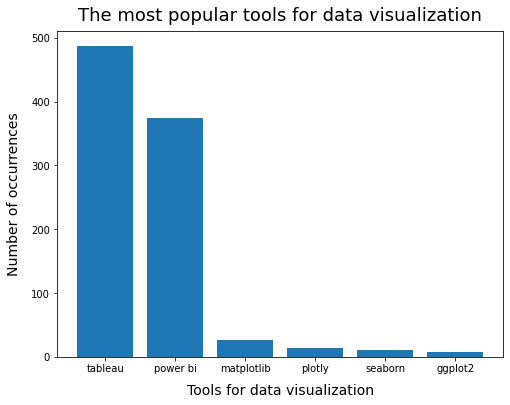

In [8]:
data_visualization = reqs_df.loc[reqs_df.group_of_requirements == "data visualization"].groupby("requirement")["number_of_occurrences"].sum()
data_visualization = data_visualization.replace(0, None).dropna().drop("data visualization").sort_values(ascending=False)

plt.bar(x=data_visualization.keys(), height=data_visualization)
plt.title("The most popular tools for data visualization", fontsize=18, pad=10)
plt.xlabel("Tools for data visualization", fontsize=14, labelpad=10)
plt.ylabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

#### The most popular tools for distributed computing

We can clearly see that the most popular tools for distributed computing are Apache Spark, Apache Hadoop, and Apache Hive.

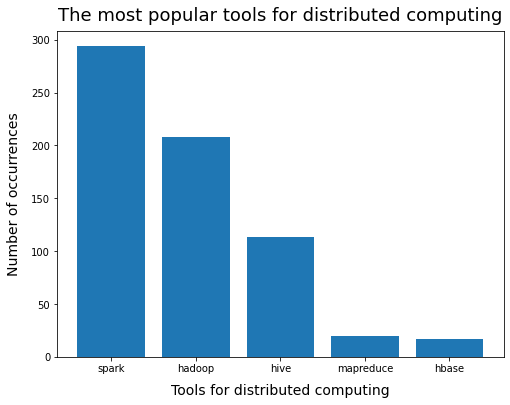

In [84]:
distributed_computing = reqs_df.loc[reqs_df.group_of_requirements == "distributed computing"].groupby("requirement")["number_of_occurrences"].sum()
distributed_computing = distributed_computing.replace(0, None).dropna().drop("distributed computing").sort_values(ascending=False)

plt.bar(x=distributed_computing.keys(), height=distributed_computing)
plt.title("The most popular tools for distributed computing", fontsize=18, pad=10)
plt.xlabel("Tools for distributed computing", fontsize=14, labelpad=10)
plt.ylabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

#### The most popular cloud technologies platforms

It is easy to notice that the most popular cloud technologies platform is AWS, with Azure and Google Cloud following closely behind.

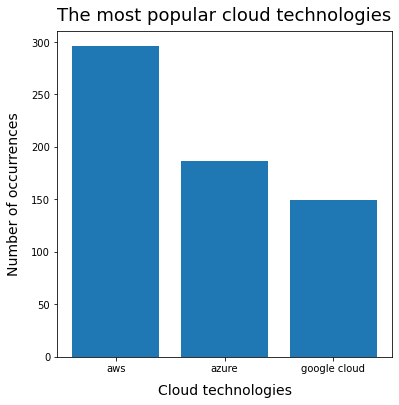

In [85]:
cloud_technologies = reqs_df.loc[reqs_df.group_of_requirements == "cloud technologies"].groupby("requirement")["number_of_occurrences"].sum()
cloud_technologies = cloud_technologies.replace(0, None).dropna().drop("cloud technologies").sort_values(ascending=False)

plt.bar(x=cloud_technologies.keys(), height=cloud_technologies)
plt.title("The most popular cloud technologies platforms", fontsize=18, pad=10)
plt.xlabel("Cloud technologies platform", fontsize=14, labelpad=10)
plt.ylabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

#### The most popular statistical software

Based on the bar chart below the most popular statistical software is SPSS, and Stata is the second most popular.

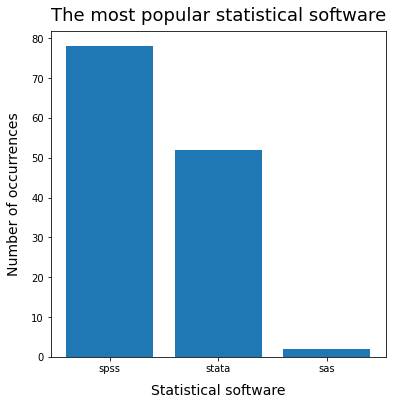

In [86]:
stat_software = reqs_df.loc[reqs_df.group_of_requirements == "statistical software"].groupby("requirement")["number_of_occurrences"].sum()
stat_software = stat_software.replace(0, None).dropna().drop("statistical software").sort_values(ascending=False)

plt.bar(x=stat_software.keys(), height=stat_software)
plt.title("The most popular statistical software", fontsize=18, pad=10)
plt.xlabel("Statistical software", fontsize=14, labelpad=10)
plt.ylabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

#### The most popular tools for NoSQL

From the visualizatiojn below we can clearly see the popularity of different NoSQL data storages.

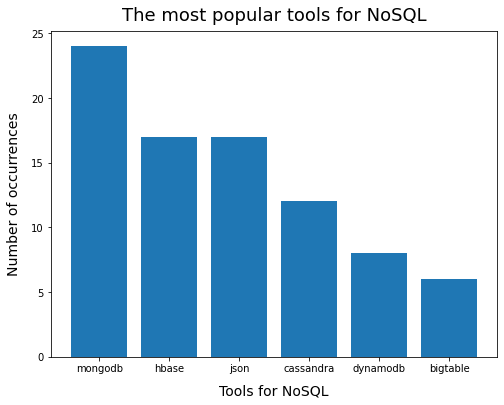

In [87]:
nosql = reqs_df.loc[reqs_df.group_of_requirements == "nosql"].groupby("requirement")["number_of_occurrences"].sum()
nosql = nosql.replace(0, None).dropna().drop("nosql").sort_values(ascending=False)

plt.bar(x=nosql.keys(), height=nosql)
plt.title("The most popular tools for NoSQL", fontsize=18, pad=10)
plt.xlabel("Tools for NoSQL", fontsize=14, labelpad=10)
plt.ylabel("Number of occurrences", fontsize=14, labelpad=10)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()